# 四分位数・パーセンタイル

## 分位数

**分位数（Quantile）** は、データを小さい順に並べたときに、「全体をある割合で区切る位置」を表す統計量。

平均値は外れ値の影響を受けるのに対し、中央値など分位数は外れ値の影響を受けにくいのが特徴。

### 四分位数

データの下位25%、下位50%、下位75%との分割境界の値

| 名称     | 記号    | 意味            |
| ------ | ----- | ------------- |
| 第1四分位数 | $Q_1$ | 下位25%の境界      |
| 第2四分位数 | $Q_2$ | 下位50%の境界（中央値） |
| 第3四分位数 | $Q_3$ | 下位75%の境界      |

### パーセンタイル（Percentiles）

パーセンタイルは、データを昇順に並べたときに「下位 $p\%$ に位置する値」を表す（$p \in [0,100]$）。

| 四分位数  | 対応するパーセンタイル |
| ----- | ----------- |
| $Q_1$ | 25パーセンタイル   |
| $Q_2$ | 50パーセンタイル   |
| $Q_3$ | 75パーセンタイル   |



### 四分位範囲（Interquartile Range: IQR）

四分位数はばらつきの指標としても使われる。

$$
IQR = Q_3 - Q_1
$$



## ℹ️ boxplotの外れ値の定義はなぜ「四分位範囲×1.5」なのか？

正規分布における2.7σと概ね近似するため、十分に稀な事象であることの閾値として提案されたらしい。

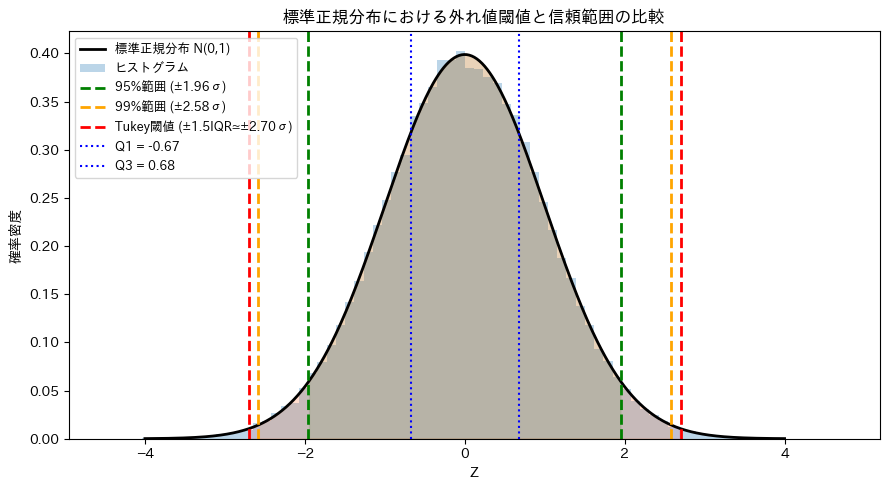

Q1 = -0.673, Q3 = 0.676, IQR = 1.349
Tukey下限 = -2.697, 上限 = 2.700


In [1]:
import numpy as np
import matplotlib_fontja
import matplotlib.pyplot as plt
import scipy.stats as st

# 標準正規分布データ
rng = np.random.default_rng(0)
data = rng.normal(0, 1, 100_000)

# 四分位数とIQR
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# 各範囲
limits = {
    "95%範囲 (±1.96σ)": (-1.96, 1.96),
    "99%範囲 (±2.58σ)": (-2.58, 2.58),
    "Tukey閾値 (±1.5IQR≃±2.70σ)": (lower, upper),
}

# 確率密度
x = np.linspace(-4, 4, 500)
pdf = st.norm.pdf(x)

# 図を描画
plt.figure(figsize=(9, 5))
plt.plot(x, pdf, 'k-', lw=2, label="標準正規分布 N(0,1)")
plt.hist(data, bins=80, density=True, alpha=0.3, label="ヒストグラム")

# 範囲線の描画
colors = {"95%範囲 (±1.96σ)": "green", "99%範囲 (±2.58σ)": "orange", "Tukey閾値 (±1.5IQR≃±2.70σ)": "red"}

for label, (lo, hi) in limits.items():
    plt.axvline(lo, color=colors[label], linestyle='--', lw=2)
    plt.axvline(hi, color=colors[label], linestyle='--', lw=2, label=label)
    plt.fill_between(x, 0, pdf, where=(x >= lo) & (x <= hi), color=colors[label], alpha=0.1)

# 四分位数線
plt.axvline(q1, color='blue', linestyle=':', lw=1.5, label=f"Q1 = {q1:.2f}")
plt.axvline(q3, color='blue', linestyle=':', lw=1.5, label=f"Q3 = {q3:.2f}")

plt.title("標準正規分布における外れ値閾値と信頼範囲の比較")
plt.xlabel("Z")
plt.ylabel("確率密度")
plt.legend(loc="upper left", fontsize=9)
plt.tight_layout()
plt.show()

# 数値表示
print(f"Q1 = {q1:.3f}, Q3 = {q3:.3f}, IQR = {iqr:.3f}")
print(f"Tukey下限 = {lower:.3f}, 上限 = {upper:.3f}")
